# Examen parcial 4  $\color{red}{\text{(10p max)}}$ (Equaciones diferenciales)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.20am del 30.09.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

## Ejercicio 1. $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial:
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
a) Usando `scipy.integrate.solve_bvp` resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40  
T(x=10)=200

b) Hace grafico de T(x) vs x (con etiquietas y legend) 

In [5]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt


En primer lugar, la ecuación diferencial, al ser de segundo orden, debe ser reducida de tal manera que pueda tratarse como un sistema de ecuaciones de primer orden equivalente. 
Sea

$\frac{dT}{dx}=Z$

$\frac{dZ}{dx}=0.01T-0.2$

Una vez establecido el sistema, requerimos expresarlo en una forma vectorial, sea

$R_v=[dZ/dx,dT/dx]$

y definimos entonces el lado derecho del sistema de ecuaciones diferenciales en forma vectorial, así como la función de residuales dada por la condición de frontera




In [ ]:
def dR_dx(x,R):
  dR_dx=np.zeros((R.shape))
  dR_dx[0]=R[1]
  dR_dx[1]=0.01*R[0]-0.2
  return dR_dx


def boundaryc(ya,yb):
    res=np.array([0.0,0.0])
    res[0]=ya[0] - 40
    res[1]=yb[0] - 200
    return res

In [ ]:
#Defino ahora la rejilla de puntos en los cuales quiero trabajar
n = 1000
x = np.linspace(0,10,n) 

#Y a la matriz con los valores respectivos de las variables, o mejor dicho, el arreglo que almacena los vectores R

R= np.zeros((2,n))

In [ ]:
#Y procedemos a resolver

R_ajustado = solve_bvp(dR_dx, boundaryc, x, R)

In [ ]:
R_ajustado.y

array([[ 40.        ,  40.12704163,  40.25410343, ..., 199.56126536,
        199.78054261, 200.        ],
       [ 12.69045582,  12.69246418,  12.69448526, ...,  21.89680663,
         21.91479171,  21.93279874]])

In [ ]:
#Verificamos que la solución obtenida tenga el mismo tamaño que la rejilla
print(len(R_ajustado.y[0]))
print(len(x))

1000
1000


Text(0, 0.5, 'Temperatura[T]')

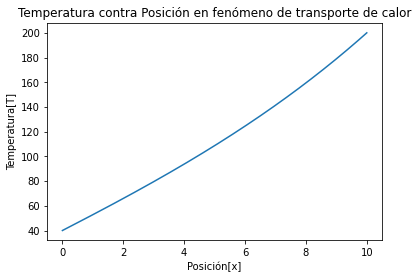

In [ ]:
#Y obtenemos la gráfica.
plt.plot(x,R_ajustado.y[0])
plt.title("Temperatura contra Posición en fenómeno de transporte de calor")
plt.xlabel("Posición[x]")
plt.ylabel("Temperatura[T]")

Nótese en esta gráfica la manera en la que efectivamente la solución cruza (quizás aproximadamente) por los valores esperados en los dos puntos frontera. 
Esta gráfica es entonces la respuesta obtenida para el perfil de temperaturas asociado al transporte de calor en el objeto buscado. 

## Ejercicio 2.  $\color{red}{\text{(4p)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

Digamos que una taza de café tiene una temperatura inicial de 90 centígrados y la temperatura ambiente es de 25 centígrados.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.06

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* si le gusta tomar café cuando está a más de 70 grados, ¿cuál es el tiempo máximo que puede esperar antes de beber el café (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
#Este es mucho más sencillo así que omitiré detalles puesto que el tiempo apremia

#  Sea y=T
k=-0.06
Tm=25
T0=90

#Aquí definimos el intervalo de ajuste
a=0
b=60

def dR_dT(t,T):
  dR=k*(T-Tm)
  return dR

n=100
t=np.linspace(a,b,n) 

DT=(a,b)
Tini=[T0]

In [ ]:
#Y resolvemos

Temperature_Sol=solve_ivp(dR_dT,DT,Tini,t_eval=t)

In [ ]:
#Prueba de escritorio
print(Temperature_Sol.y[0])

[90.         87.67882237 85.44053514 83.28217852 81.20046811 79.19116184
 77.25200466 75.380975   73.5760753  71.83533194 70.1567953  68.53853974
 66.97866357 65.47528911 64.02656263 62.6306544  61.28575864 59.99009356
 58.74190136 57.5394482  56.38102422 55.26494353 54.18954423 53.15318839
 52.15426206 51.19117525 50.26236198 49.36628022 48.50141192 47.66626301
 46.85936339 46.07932657 45.32606611 44.59918713 43.89790605 43.22145028
 42.56905824 41.93997931 41.3334739  40.7488134  40.18528019 39.64216766
 39.11878018 38.61443312 38.12845284 37.66017669 37.20895303 36.77414121
 36.35511156 35.95124543 35.56193513 35.18658399 34.82460633 34.47542746
 34.1384837  33.81322232 33.49910165 33.19563008 32.90261066 32.61978414
 32.3468631  32.08356316 31.829603   31.58470436 31.34859203 31.12099388
 30.90164079 30.69026676 30.48660879 30.29040696 30.10140443 29.91934737
 29.74398504 29.57506976 29.41235688 29.25560482 29.10457508 28.95903219
 28.81874373 28.68348037 28.5530158  28.4271268  28

Text(0, 0.5, 'Temperatura[°C]')

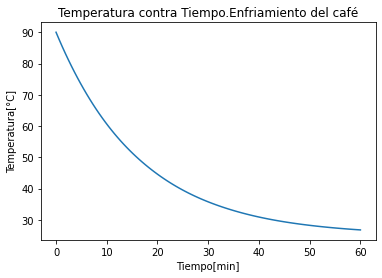

In [ ]:
plt.plot(t,Temperature_Sol.y[0])
plt.title("Temperatura contra Tiempo.Enfriamiento del café")
plt.xlabel("Tiempo[min]")
plt.ylabel("Temperatura[°C]")


Adicionalmente buscamos el tiempo mínimo antes de que la temperatura descienda de los 70°C

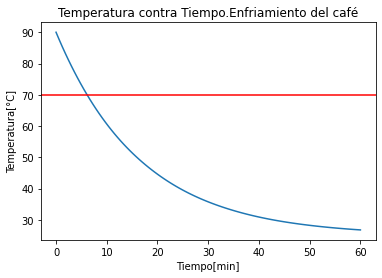

In [ ]:
plt.plot(t,Temperature_Sol.y[0])
plt.title("Temperatura contra Tiempo.Enfriamiento del café")
plt.xlabel("Tiempo[min]")
plt.ylabel("Temperatura[°C]")
plt.axhline(y=70, xmin=0, xmax=60,color="red")

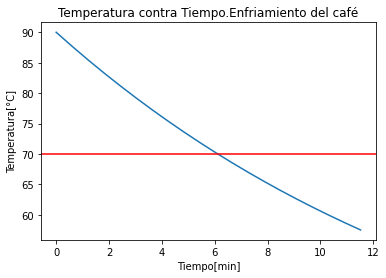

In [ ]:
plt.plot(t[0:20],Temperature_Sol.y[0][0:20])
plt.title("Temperatura contra Tiempo.Enfriamiento del café")
plt.xlabel("Tiempo[min]")
plt.ylabel("Temperatura[°C]")
plt.axhline(y=70, xmin=0, xmax=10,color="red")

Gráficamente es claro que es algo menos de diez minutos. Con el zoom que le hice, podríamos hacer una estimación muy precisa a ojímetro. 
El tiempo máximo de espera para consumir el café estando aún por encima de la temperatura deseada es de 6 minutos. 

Sin embargo, es posible  usar los métodos de Python para obtener una estimación mejor. Elegir el argumento es una opción razonable...

Para esto, solo deben restarse los valores de la solución con el valor esperado, y aquellos que estén por debajo de un rango son los únicos que se seleccionarán para graficar, claramente, en el proceso, habrá que eliminar los valores que estén suficiente cerca de la temperatura deseada pero por debajo de ella. De manera más precisa, la condición múltiple

$ T(k)-70 < tol, T(k)-70>0 $
Definen a los puntos suficiente cercanos para considerarse buenos candidatos. Yo además de esto, seleccionaré al mínimo de ellos. 

In [ ]:
from numpy import abs

Tdeseada=70*np.ones(Temperature_Sol.y[0].shape)

Tk=Temperature_Sol.y[0]-Tdeseada

#Reacomodamos las negativas. 
for i in range(0,len(Tk),1):
  if ( (Temperature_Sol.y[0][i]-70)<0 ):
    Tk[i]=-(Temperature_Sol.y[0][i]-70)+70

indice=np.argmin(Tk)
print(indice)
print(t[10])
print(Temperature_Sol.y[0][10])
print(Temperature_Sol.y[0][11])
print("En mi rejilla, el valor de tiempo más cercano al tiempo mínimo en el que puede beberse el cafe es:", t[indice])

10
6.0606060606060606
70.15679530181957
68.53853973682047
En mi rejilla, el valor de tiempo más cercano al tiempo mínimo en el que puede beberse el cafe es: 6.0606060606060606


## Ejercicio 3.  $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


Este problema es idéntico en planteamiento al punto 1 de este examen por lo que omitiré explicaciones adicionales y me limitaré a usar nuevamente el código que ya había hecho para ese problema. El tiempo apremia. 


Sea $v=dy/dx$
Y el sistema a resolver

$dv/dt=-g$

$dy/dt=v$

y sea r un vector que almacena la posición y la velocidad respectivamente

In [ ]:
# Aquí estamos despreciando efectos aerodinámicos y considerando que el cohete está únicamente sujeto a la acción de la gravedad una vez este es lanzado 

a=0
b=5
h0=0
h5=40
g=-9.80665


In [ ]:
def dr_dt(x,r):
  dr_dt=np.zeros((r.shape))
  dr_dt[0]=r[1]
  dr_dt[1]=-g
  return dr_dt


def boundc(ya,yb):
    res=np.array([0.0,0.0])
    res[0]=ya[0] - h0
    res[1]=yb[0] - h5
    return res

In [ ]:
#Defino ahora la rejilla de puntos en los cuales quiero trabajar
n = 1000
t = np.linspace(a,b,n) 
#Y a la matriz con los valores respectivos de las variables, o mejor dicho, el arreglo que almacena los vectores R
r= np.zeros((2,n))

In [ ]:
#Y procedemos a resolver
r_solution = solve_bvp(dr_dt, boundc, t, r)

Text(0, 0.5, 'Altura[m]')

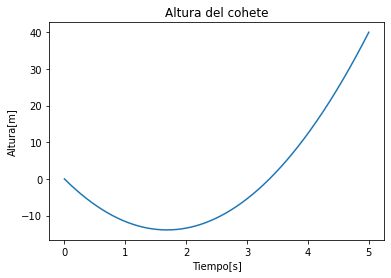

In [ ]:
#Y obtenemos la gráfica. Note en ella que 
plt.plot(t,r_solution.y[0])
plt.title("Altura del cohete")
plt.xlabel("Tiempo[s]")
plt.ylabel("Altura[m]")

Desconozco la situación física a detalle. Sin embargo, los valores de la función son consistentes con los valores de frontera impuestos. 

## Ejercicio 4 Ecuaciones diferenciales acopladas - problema de valor inicial `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa, son un par de ecuaciones de primer orden, no lineales, ecuaciones diferenciales utilizadas con frecuencia para describir la dinámica de los sistemas biológicos en los que interactúan dos especies, uno como depredador y el otro como presa. Las poblaciones cambian a través del tiempo de acuerdo con el par de ecuaciones. 

$$\frac{dx}{dt}=x(\color{red}{\alpha}-\color{red}{\beta} y)$$
$$\frac{dy}{dt}=-y(\color{red}{\gamma}-\color{red}{\delta} x)$$

Esa ecuación describiría la evolución de la población de conejos y zorros (condiciones perfectas)

* x - numbero de conejos  
* y - numbero de zorros

* $\color{red}{\alpha, \beta, \gamma, \delta }$ son parámetros que describen la interacción de las dos especies

* $\frac{dx}{dt}, \frac{dy}{dt}$ representan las tasas de crecimiento de las dos poblaciones a lo largo del tiempo

* $t$ es tiempo

![](https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_IV/rabbits_foxes.png)

a) solucionar los ecuaciones diferenciales usando `scipy.integrate.solve_ivp` o `scipy.integrate.odeint`
asumir: 
* $\alpha, \beta, \gamma, \delta = 1$
* $x_{ini}=4$
* $y_{ini}=2$
* $t=0:30$ (unidades arbitrarias, asumir meses)

b) hacer plot $x$ vs. $t$ , $y$ vs. $t$   
c) hacer plot $x vs y$  
d) comentar sobre los dos plots  

In [92]:
x0=4
y0=2
t0=0
tf=30

#Y sean a = alpha, b = beta, c = gamma, d = delta

a,b,c,d = 1,1,1,1

R0=[x0,y0]

In [102]:
def dR_dt(t,R):
  dR_dt=np.zeros((R.shape))
  dR_dt[0]=R[0]*(1-R[1])
  dR_dt[1]=-R[1]*(1-R[0])
  return dR_dt



In [103]:
n=100000
t=np.linspace(t0,tf,n) 

Dt=(t0,tf)
Rini=[R0]

In [95]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [104]:
R_Solution=solve_ivp(dR_dt,Dt,R0,t_eval=t)

#print(R_Solution)

In [ ]:
#Pero no estoy muy seguro de porque este método no funciona. Lo siento profe, este punto lo quedo debiendo para la próxima vez. 
# Me encanta la biología, y en este problema espero poderlo profundizar algún estudio posterior.

Para los conejos


Text(0, 0.5, 'Número de conejos')

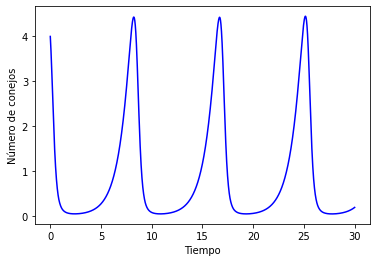

In [105]:
print("Para los conejos")
plt.plot(R_Solution.t, R_Solution.y[0], color="blue")
plt.xlabel("Tiempo")
plt.ylabel("Número de conejos")


Para los zorros


Text(0, 0.5, 'Número de zorros')

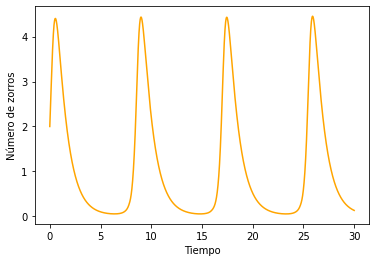

In [106]:

print("Para los zorros")
plt.plot(R_Solution.t, R_Solution.y[1], color="orange")
plt.xlabel("Tiempo")
plt.ylabel("Número de zorros")

Text(0.5, 0, 'Tiempo')

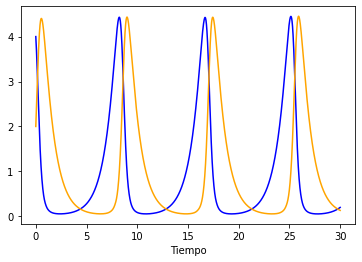

In [107]:
#Combinando ambas gráficas

plt.plot(R_Solution.t, R_Solution.y[0], color="blue")
plt.plot(R_Solution.t, R_Solution.y[1], color="orange")
plt.xlabel("Tiempo")

Text(0, 0.5, 'Número de zorros')

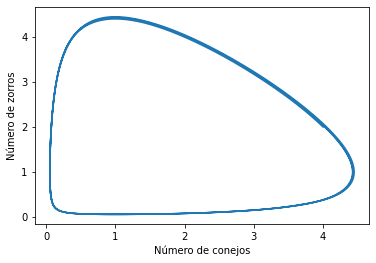

In [108]:
plt.plot(R_Solution.y[0], R_Solution.y[1])
plt.xlabel("Número de conejos")
plt.ylabel("Número de zorros")

Según las gráficas puede identificarse que bajo estas condiciones iniciales, el comportamiento del sistema muestra una relación muy estrecha entre las poblaciones de los lobos y los conejos. 
La característica más notoria del sistema es su estabilidad, el comportamiento en el tiempo de las poblaciones es bastante periódico, lo cual se evidencia mejor en el diagrama de fases ilustrado. De este pueden tomarse interpretaciones mucho más fuertes.

Si el número de zorros es bajo, un aumento o disminución en el número de conejos no tiene mayor efecto en la población de zorros (el diagrama es aplanado en su parte inferior). Y más aún, para una baja población de zorros, la cantidad de conejos y zorros esta directamente relacionada (aumento de conejos, aumento de zorros).

No obstante, si el número de zorros es alto, un aumento o disminución en la cantidad de conejos tiene un efecto muy importante y genera un cambio notable en la cantidad de zorros. Más aún, la relación se invierte y se hace inversamente proporcional. Esto se debe a que claramente, a una alta cantidad de zorros limita mucho el crecimiento de la población de conejos, creando competencia y dando una tendencia al decrecimiento en la población de zorros (si hay muchos zorros, los zorros tienden a disminuir).

Sin embargo, hay cierta estabilidad, pues según el modelo, en algunas épocas los conejos o los zorros aumentan y en otras disminuyen, no obstante, después de un tiempo las poblaciones regresan a sus proporciones originales una y otra vez. 